# Machine Learning Model to Predict the Prices of the Houses based on the Features Provided.

In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the file
df=pd.read_csv('Bengaluru_House_Data.csv',encoding='latin1')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488


# Exploratory Data Analysis (EDA) & Preprocessing

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [4]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [6]:
df.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320
unique,4,81,1305,31,2688,2117,NaN,NaN,2205
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,75
freq,8790,10581,540,5199,80,843,NaN,NaN,303
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN


In [7]:
# checking for null values
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### area_type column

In [8]:
# area_type column
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
df['area_type']=df['area_type'].str.replace('  ','-')

In [10]:
df['area_type'].value_counts()

Super built-up-Area    8790
Built-up-Area          2418
Plot-Area              2025
Carpet-Area              87
Name: area_type, dtype: int64

### location column

In [11]:
# location column
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [12]:
d2=pd.DataFrame(df['location'].value_counts())
l3=[]
l4=[]
for i in df['location'].value_counts():
    l4.append(i)
for row in d2.index:
    l3.append(row)
res_2=dict(zip(l3,l4))
print(res_2)

{'Whitefield': 540, 'Sarjapur  Road': 399, 'Electronic City': 302, 'Kanakpura Road': 273, 'Thanisandra': 234, 'Yelahanka': 213, 'Uttarahalli': 186, 'Hebbal': 177, 'Marathahalli': 175, 'Raja Rajeshwari Nagar': 171, 'Bannerghatta Road': 152, 'Hennur Road': 152, '7th Phase JP Nagar': 149, 'Haralur Road': 142, 'Electronic City Phase II': 132, 'Rajaji Nagar': 107, 'Chandapura': 100, 'Bellandur': 96, 'KR Puram': 91, 'Electronics City Phase 1': 88, 'Hoodi': 88, 'Yeshwanthpur': 85, 'Begur Road': 84, 'Sarjapur': 82, 'Kasavanhalli': 80, 'Harlur': 79, 'Banashankari': 75, 'Hormavu': 74, 'Ramamurthy Nagar': 73, 'Kengeri': 73, 'JP Nagar': 72, 'Hosa Road': 72, 'Koramangala': 72, 'Jakkur': 71, 'Old Madras Road': 71, 'Varthur': 70, 'Kothanur': 66, 'Kaggadasapura': 64, 'Nagarbhavi': 63, 'Thigalarapalya': 62, 'Akshaya Nagar': 62, 'TC Palaya': 60, 'Malleshwaram': 58, '8th Phase JP Nagar': 57, 'Rachenahalli': 56, 'Hennur': 55, 'Budigere': 54, 'Jigani': 54, 'HSR Layout': 53, 'Jalahalli': 52, 'Hulimavu': 52,

In [13]:
df[df['location'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up-Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86


In [14]:
# filling the null value with the most occured name in location column that is whitefield
df['location']=df['location'].fillna(value='Whitefield')
df['location']=df['location'].str.replace('  ',' ')

### total_sqft column

In [15]:
df['total_sqft'].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [16]:
d3=pd.DataFrame(df['total_sqft'].value_counts())
l5=[]
l6=[]
for i in df['total_sqft'].value_counts():
    l6.append(i)
    
for row in d3.index:
    l5.append(row)
res_3=dict(zip(l5,l6))
res_3

{'1200': 843,
 '1100': 221,
 '1500': 205,
 '2400': 196,
 '600': 180,
 '1000': 172,
 '1350': 133,
 '1050': 123,
 '1300': 117,
 '1250': 114,
 '900': 112,
 '1400': 108,
 '1800': 104,
 '1150': 101,
 '1600': 101,
 '1140': 91,
 '2000': 83,
 '1450': 70,
 '1650': 69,
 '800': 67,
 '3000': 66,
 '1075': 66,
 '1020': 63,
 '2500': 62,
 '1550': 60,
 '1160': 60,
 '1125': 60,
 '950': 59,
 '1180': 58,
 '1700': 58,
 '1260': 57,
 '1255': 56,
 '1220': 55,
 '1080': 55,
 '1070': 53,
 '700': 52,
 '750': 52,
 '1225': 48,
 '4000': 48,
 '1175': 48,
 '1320': 46,
 '1240': 46,
 '2100': 46,
 '1230': 45,
 '1060': 45,
 '1210': 44,
 '850': 43,
 '1280': 42,
 '1270': 41,
 '1185': 41,
 '1190': 40,
 '1170': 40,
 '1410': 40,
 '1750': 39,
 '1330': 38,
 '1025': 38,
 '1290': 37,
 '1310': 37,
 '1850': 37,
 '1065': 36,
 '1194': 36,
 '1090': 35,
 '1215': 35,
 '500': 34,
 '1360': 33,
 '2700': 33,
 '1115': 33,
 '1900': 32,
 '3500': 32,
 '1120': 32,
 '1464': 32,
 '1530': 31,
 '1205': 31,
 '1340': 31,
 '2200': 31,
 '1430': 31,
 '103

In [17]:
df[df['total_sqft'].str.contains('-')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up-Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186
56,Built-up-Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192
81,Built-up-Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,? 224.50
122,Super built-up-Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,? 477.00
137,Super built-up-Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,? 54.01
...,...,...,...,...,...,...,...,...,...
12990,Super built-up-Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122
13059,Super built-up-Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.76
13240,Super built-up-Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.57
13265,Super built-up-Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [18]:
df[df['total_sqft'].str.contains('Sq')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up-Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.5
775,Built-up-Area,Ready To Move,Basavanagara,1 BHK,NaN,1000Sq. Meter,2.0,1.0,93
872,Super built-up-Area,Ready To Move,Singapura Village,2 BHK,NaN,1100Sq. Yards,2.0,NaN,45
1400,Super built-up-Area,Ready To Move,Chamrajpet,9 BHK,NaN,716Sq. Meter,9.0,1.0,296
1712,Plot-Area,Ready To Move,Singena Agrahara,3 Bedroom,CoiewSy,1500Sq. Meter,3.0,1.0,95
1743,Super built-up-Area,19-Mar,Hosa Road,3 BHK,Sosisic,142.61Sq. Meter,3.0,1.0,115
1821,Plot-Area,Ready To Move,Sarjapur,3 Bedroom,Inensba,1574Sq. Yards,3.0,1.0,76
2310,Super built-up-Area,Ready To Move,Whitefield,4 BHK,Haestt,361.33Sq. Yards,4.0,NaN,270
2881,Built-up-Area,Ready To Move,Volagerekallahalli,2 BHK,PSterAs,117Sq. Yards,2.0,2.0,38
3228,Built-up-Area,Ready To Move,Dodda Banaswadi,5 Bedroom,NaN,3040Sq. Meter,5.0,1.0,140


In [19]:
df[df['total_sqft'].str.contains('Perch')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
648,Built-up-Area,Ready To Move,Arekere,9 Bedroom,NaN,4125Perch,9.0,NaN,265


In [20]:
df[df['total_sqft'].str.contains('Acres')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1019,Plot-Area,18-Mar,Marathi Layout,1 Bedroom,NaN,5.31Acres,1.0,0.0,110
1086,Plot-Area,19-Mar,Narasapura,2 Bedroom,NaN,30Acres,2.0,2.0,29.5
6333,Plot-Area,Ready To Move,Harohalli,2 Bedroom,NaN,2.09Acres,2.0,0.0,200
7334,Plot-Area,Ready To Move,Kanakpura Road,1 Bedroom,NaN,2Acres,1.0,0.0,125
7607,Plot-Area,Ready To Move,Bommenahalli,3 Bedroom,Prood G,15Acres,3.0,1.0,217
7726,Plot-Area,Ready To Move,Kanakpura Road,1 Bedroom,NaN,1.26Acres,1.0,0.0,125
10488,Plot-Area,Ready To Move,2 Bedroom Furnished Farm House in Kolar Road,2 Bedroom,NaN,1.25Acres,2.0,2.0,200
11615,Plot-Area,Ready To Move,arudi,3 Bedroom,NaN,6Acres,2.0,0.0,80


In [21]:

df[df['total_sqft'].str.contains('Cents')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5453,Plot-Area,Ready To Move,Kannur,6 Bedroom,NaN,3Cents,6.0,3.0,75
7001,Plot-Area,Ready To Move,Thyagaraja Nagar,8 Bedroom,NaN,1500Cents,6.0,2.0,290


In [22]:

df[df['total_sqft'].str.contains('Guntha')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6552,Plot-Area,Ready To Move,5 Bedroom Farm House in Lakshmipura,5 Bedroom,NaN,24Guntha,6.0,2.0,550
11320,Plot-Area,Ready To Move,Arishinakunte,1 Bedroom,NaN,38Guntha,1.0,0.0,170


In [23]:

df[df['total_sqft'].str.contains('Grounds')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9423,Plot-Area,Ready To Move,Ramamurthy Nagar,1 Bedroom,NaN,1Grounds,1.0,1.0,48


In [24]:
#create a new column sq
df['sqft_cnvt']=np.nan

In [25]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft_cnvt
0,Super built-up-Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN
1,Plot-Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN
2,Built-up-Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN
3,Super built-up-Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN
4,Super built-up-Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up-Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231,NaN
13316,Super built-up-Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400,NaN
13317,Built-up-Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60,NaN
13318,Super built-up-Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488,NaN


In [26]:
# filling the new sqft_cnvt(square foot converter column) with 1 corresponding to total_sqft column which is already in square foot
cond_1=(df['total_sqft']!=df['total_sqft'].str.contains('Acres'))&(df['total_sqft']!=df['total_sqft'].str.contains('Perch'))&(df['total_sqft']!=df['total_sqft'].str.contains('Sq'))&(df['total_sqft']!=df['total_sqft'].str.contains('Cents'))&(df['total_sqft']!=df['total_sqft'].str.contains('Gunta'))&(df['total_sqft']!=df['total_sqft'].str.contains('Grounds'))

df.loc[cond_1, 'sqft_cnvt'] = 1

In [27]:
# 1 square meter= 43560
#filling the new sqft_cnvt(square foot converter column) with 10.76 corresponding to total_sqft column which is in achers
cond_2=df['total_sqft']==df['total_sqft'].str.contains('Acres')
df.loc[cond_2, 'sqft_cnvt'] = 43560

In [28]:
#1prech=272.25 Square Feet
cond_3=df['total_sqft']==df['total_sqft'].str.contains('Perch')
df.loc[cond_3, 'sqft_cnvt'] = 272.25

In [29]:
#1 square meter= 10.76 square feet
cond_4=df['total_sqft']==df['total_sqft'].str.contains('Sq. Meter')
df.loc[cond_4, 'sqft_cnvt'] = 10.76

In [30]:
#1 Square yard to square feet: 1 sq yd = 9 sq ft
cond_5=df['total_sqft']==df['total_sqft'].str.contains('Sq. Yards')
df.loc[cond_5, 'sqft_cnvt'] = 9

In [31]:
#1 cent equals 435.6 square feet.
cond_6=df['total_sqft']==df['total_sqft'].str.contains('Cents')
df.loc[cond_6, 'sqft_cnvt'] = 435.6

In [32]:
# 1 guntha is equal to 1,089 square feet
cond_7=df['total_sqft']==df['total_sqft'].str.contains('Guntha')
df.loc[cond_7, 'sqft_cnvt'] = 1089

In [33]:
# 1 ground=2400.35 square feet
cond_8=df['total_sqft']==df['total_sqft'].str.contains('Grounds')
df.loc[cond_8, 'sqft_cnvt'] = 2400.35

In [34]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft_cnvt
0,Super built-up-Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,1.0
1,Plot-Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,1.0
2,Built-up-Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,1.0
3,Super built-up-Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,1.0
4,Super built-up-Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,1.0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up-Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231,1.0
13316,Super built-up-Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400,1.0
13317,Built-up-Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60,1.0
13318,Super built-up-Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488,1.0


In [35]:
df['total_sqft']=df['total_sqft'].str.replace('Sq. Meter','')
df['total_sqft']=df['total_sqft'].str.replace('Sq. Yards','')
df['total_sqft']=df['total_sqft'].str.replace('Perch','')
df['total_sqft']=df['total_sqft'].str.replace('Acres','')
df['total_sqft']=df['total_sqft'].str.replace('Cents','')
df['total_sqft']=df['total_sqft'].str.replace('Guntha','')
df['total_sqft']=df['total_sqft'].str.replace('Grounds','')

In [36]:
# creating 2 new columns for satat_value and end_value and splitting the datas in total_sqft column containing '-' using split method.
df[['start_value','end_value']]=df['total_sqft'].str.split('-',expand=True)

In [37]:
df['start_value']=pd.to_numeric(df['start_value'])
df['end_value']=pd.to_numeric(df['end_value'])

In [38]:
df['end_value']=df['end_value'].fillna(value=df['start_value'])

In [39]:
# creating the new column average and finding the average between 2 aplit columns
df['average'] = (df['start_value'] + df['end_value']) / 2

In [40]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft_cnvt,start_value,end_value,average
0,Super built-up-Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,1.0,1056.0,1056.0,1056.0
1,Plot-Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,1.0,2600.0,2600.0,2600.0
2,Built-up-Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,1.0,1440.0,1440.0,1440.0
3,Super built-up-Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,1.0,1521.0,1521.0,1521.0
4,Super built-up-Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,1.0,1200.0,1200.0,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up-Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231,1.0,3453.0,3453.0,3453.0
13316,Super built-up-Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400,1.0,3600.0,3600.0,3600.0
13317,Built-up-Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60,1.0,1141.0,1141.0,1141.0
13318,Super built-up-Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488,1.0,4689.0,4689.0,4689.0


In [41]:
# multiplying the average column and sqft_cnvt column to get the final square feet
df['total_sqft_final']=df['average']*df['sqft_cnvt']

In [42]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft_cnvt,start_value,end_value,average,total_sqft_final
0,Super built-up-Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,1.0,1056.0,1056.0,1056.0,1056.0
1,Plot-Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,1.0,2600.0,2600.0,2600.0,2600.0
2,Built-up-Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,1.0,1440.0,1440.0,1440.0,1440.0
3,Super built-up-Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,1.0,1521.0,1521.0,1521.0,1521.0
4,Super built-up-Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,1.0,1200.0,1200.0,1200.0,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up-Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231,1.0,3453.0,3453.0,3453.0,3453.0
13316,Super built-up-Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400,1.0,3600.0,3600.0,3600.0,3600.0
13317,Built-up-Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60,1.0,1141.0,1141.0,1141.0,1141.0
13318,Super built-up-Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488,1.0,4689.0,4689.0,4689.0,4689.0


In [43]:
# drop the columns that are not required
df=df.drop(columns=['total_sqft','start_value','end_value','average','sqft_cnvt'])

In [44]:
df

,area_type,availability,location,size,society,bath,balcony,price,total_sqft_final
0,Super built-up-Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,2.0,1.0,$39.07,1056.0
1,Plot-Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,5.0,3.0,$120.00,2600.0
2,Built-up-Area,Ready To Move,Uttarahalli,3 BHK,NaN,2.0,3.0,$62.00,1440.0
3,Super built-up-Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,3.0,1.0,$95.00,1521.0
4,Super built-up-Area,Ready To Move,Kothanur,2 BHK,NaN,2.0,1.0,$51.00,1200.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up-Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,4.0,0.0,231,3453.0
13316,Super built-up-Area,Ready To Move,Richards Town,4 BHK,NaN,5.0,NaN,400,3600.0
13317,Built-up-Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,2.0,1.0,60,1141.0
13318,Super built-up-Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4.0,1.0,488,4689.0


### size column

In [45]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [46]:
# only keeping the number of rooms and removing the rest from each columns
df['size']=df['size'].str.strip()
df['size']=df['size'].str.replace('BHK','')
df['size']=df['size'].str.replace('RK','')
df['size']=df['size'].str.replace('Bedroom','')

In [47]:
df[df['size'].isna()]

,area_type,availability,location,size,society,bath,balcony,price,total_sqft_final
579,Plot-Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,NaN,NaN,34.185,1800.0
1775,Plot-Area,Immediate Possession,IVC Road,NaN,Orana N,NaN,NaN,124,3817.0
2264,Plot-Area,Immediate Possession,Banashankari,NaN,NaN,NaN,NaN,460,2400.0
2809,Plot-Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,NaN,NaN,28.785,1800.0
2862,Plot-Area,Immediate Possession,Devanahalli,NaN,Ajleyor,NaN,NaN,46.8,1950.0
5333,Plot-Area,Immediate Possession,Devanahalli,NaN,Emngs S,NaN,NaN,177.115,3752.5
6423,Plot-Area,Immediate Possession,Whitefield,NaN,SRniaGa,NaN,NaN,26.73,2324.0
6636,Plot-Area,Immediate Possession,Jigani,NaN,S2enste,NaN,NaN,25.49,1500.0
6719,Plot-Area,Immediate Possession,Hoskote,NaN,SJowsn,NaN,NaN,28.545,1730.0
7680,Plot-Area,Immediate Possession,Kasavanhalli,NaN,NaN,NaN,NaN,400,5000.0


In [48]:
print('number of missing values in size column is ',df['size'].isna().sum())

number of missing values in size column is  16


In [49]:
df['size']=df['size'].astype(str).astype(float)

In [50]:
#fill the missing values of each room by understanding the house size 
#for house size greater than 2500 sqft fill it as 3 rooms
#for house size lesser than 2500 sqft fill it as 2 rooms


for i in df['size'].index:
    if df['total_sqft_final'].iloc[i]>=2500:
        df['size'].fillna(value=3,inplace=True)
    elif df['total_sqft_final'].iloc[i]<2500:
        df['size'].fillna(value=2,inplace=True)


In [51]:
df.rename(columns={'size':'rooms'},inplace=True)

### society column

In [52]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [53]:
x=pd.DataFrame(df['society'].value_counts())
a=[]
b=[]
for i in x.index:
    a.append(i)
for i in df['society'].value_counts():
    b.append(i)
result=dict(zip(a,b))
print(result)

{'GrrvaGr': 80, 'PrarePa': 76, 'Sryalan': 59, 'Prtates': 59, 'GMown E': 56, 'Prtanha': 51, 'Bhmesy ': 51, 'Prityel': 50, 'PrityTr': 49, 'Prarkun': 49, 'Dhalsh ': 47, 'IBityin': 45, 'SNity S': 40, 'Soresea': 39, 'Adeatlm': 37, 'Soitya ': 36, 'Rosha I': 35, 'Bhe 2ko': 35, 'SunceEs': 34, 'SNnia E': 33, 'JRrnauv': 30, 'MenueNo': 29, 'Prlla C': 28, 'PuandHi': 28, 'RothaVa': 27, 'Prncyrn': 27, 'GoAirej': 26, 'Aklia R': 26, 'Raard B': 26, 'PhestOn': 26, 'Puachal': 26, 'DLhtsnd': 24, 'Dieldli': 24, 'Itelaa ': 24, 'Soazak ': 24, 'Sodgere': 23, 'ViistLa': 23, 'Brnia G': 23, 'PualeSk': 23, 'Shitt S': 23, 'Soiewre': 22, 'Prrtht ': 21, 'DLhtsan': 21, 'RInceeg': 21, 'Brway G': 21, 'SoechHa': 21, 'DLhtsen': 20, 'AsastDe': 20, 'Eladero': 20, 'Shthi S': 20, 'Prersis': 19, 'Magiaya': 19, 'Jaades ': 19, 'Klark L': 19, 'PueraRi': 18, 'Brica E': 17, 'SSestth': 17, 'SaireSa': 17, 'Oreldhi': 17, 'Prensya': 16, 'KHatsFl': 16, 'Baowsig': 16, 'SSthamh': 16, 'Sariaat': 15, 'BrlisCo': 15, 'NRosete': 15, 'Sosisic'

In [54]:
df[df['society'].isna()]

,area_type,availability,location,rooms,society,bath,balcony,price,total_sqft_final
2,Built-up-Area,Ready To Move,Uttarahalli,3.0,NaN,2.0,3.0,$62.00,1440.0
4,Super built-up-Area,Ready To Move,Kothanur,2.0,NaN,2.0,1.0,$51.00,1200.0
8,Super built-up-Area,Ready To Move,Marathahalli,3.0,NaN,3.0,1.0,$63.25,1310.0
9,Plot-Area,Ready To Move,Gandhi Bazar,6.0,NaN,6.0,NaN,$370.00,1020.0
10,Super built-up-Area,18-Feb,Whitefield,3.0,NaN,2.0,2.0,$70.00,1800.0
...,...,...,...,...,...,...,...,...,...
13310,Super built-up-Area,Ready To Move,Rachenahalli,2.0,NaN,2.0,2.0,52.71,1050.0
13311,Plot-Area,Ready To Move,Ramamurthy Nagar,7.0,NaN,9.0,2.0,250,1500.0
13312,Super built-up-Area,Ready To Move,Bellandur,2.0,NaN,2.0,2.0,47,1262.0
13316,Super built-up-Area,Ready To Move,Richards Town,4.0,NaN,5.0,NaN,400,3600.0


In [55]:
print('number of missing values in size column is ',df['society'].isna().sum())

number of missing values in size column is  5502


In [56]:
# randomely filling the missing values in society column with the heighest occured values.

value=['GrrvaGr', 'PrarePa', 'Sryalan', 'Prtates', 'GMown E', 'Prtanha', 'Bhmesy ', 'Prityel', 'PrityTr', 'Prarkun', 'Dhalsh ', 'IBityin', 'SNity S', 'Soresea', 'Adeatlm', 'Soitya ', 'Rosha I', 'Bhe 2ko', 'SunceEs', 'SNnia E', 'JRrnauv', 'MenueNo', 'Prlla C', 'PuandHi', 'RothaVa', 'Prncyrn', 'GoAirej', 'Aklia R', 'Raard B', 'PhestOn', 'Puachal', 'DLhtsnd', 'Dieldli', 'Itelaa ', 'Soazak ', 'Sodgere', 'ViistLa', 'Brnia G', 'PualeSk', 'Shitt S', 'Soiewre', 'Prrtht ', 'DLhtsan', 'RInceeg', 'Brway G', 'SoechHa', 'DLhtsen', 'AsastDe', 'Eladero', 'Shthi S', 'Prersis', 'Magiaya', 'Jaades ', 'Klark L', 'PueraRi', 'Brica E', 'SSestth', 'SaireSa', 'Oreldhi', 'Prensya', 'KHatsFl', 'Baowsig', 'SSthamh', 'Sariaat', 'BrlisCo', 'NRosete', 'Sosisic', 'GolusLi', 'Tavenew', 'Taonte ', 'PuziaVe', 'BriumMi', 'Mayne A', 'Pyikad ', 'Bregae ', 'Sovar S', 'Mahosya', 'Unm 2El', 'Prcesvy']
fill_value=np.random.choice(len(value),size=df['society'].isna().sum())
df.loc[df['society'].isna(),'society']=[value[i] for i in fill_value]

### bath column

In [57]:
df[df['bath'].isna()]

,area_type,availability,location,rooms,society,bath,balcony,price,total_sqft_final
56,Built-up-Area,20-Feb,Devanahalli,4.0,BrereAt,NaN,NaN,192,3210.0
81,Built-up-Area,18-Oct,Hennur Road,4.0,Gollela,NaN,NaN,? 224.50,3203.5
224,Super built-up-Area,19-Dec,Devanahalli,3.0,Jurdsig,NaN,NaN,? 74.82,1630.0
344,Super built-up-Area,21-Dec,Kanakpura Road,1.0,PrarePa,NaN,NaN,21.53,525.0
579,Plot-Area,Immediate Possession,Sarjapur Road,2.0,Asiss B,NaN,NaN,34.185,1800.0
...,...,...,...,...,...,...,...,...,...
11496,Super built-up-Area,21-Dec,Kanakpura Road,1.0,PrarePa,NaN,NaN,27,525.0
11569,Plot-Area,Immediate Possession,Hosur Road,2.0,AVeldun,NaN,NaN,8.44,1350.0
12768,Built-up-Area,18-Mar,Bettahalsoor,5.0,Toainnt,NaN,NaN,353,3210.0
12861,Super built-up-Area,21-Dec,KR Puram,4.0,Moquach,NaN,NaN,121,2283.0


In [58]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [59]:
# there are 73 missing values in the bath column 
# hence filling them based on house square feet

for i in df['bath'].index:
    if df['total_sqft_final'].iloc[i]>3500 :
        df['bath'].fillna(value=4,inplace=True)
    elif (df['total_sqft_final'].iloc[i]>=2500 and df['total_sqft_final'].iloc[i]<=3500) :
        df['bath'].fillna(value=3,inplace=True)
    elif (df['total_sqft_final'].iloc[i]<2500 and df['total_sqft_final'].iloc[i]>=1000):
        df['bath'].fillna(value=2,inplace=True)
    elif df['total_sqft_final'].iloc[i]<1000:
        df['bath'].fillna(value=1,inplace=True)
        


### balcony column

In [60]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [61]:
df[df['balcony'].isna()]

,area_type,availability,location,rooms,society,bath,balcony,price,total_sqft_final
6,Super built-up-Area,18-May,Old Airport Road,4.0,Jaades,4.0,NaN,$204.00,2732.0
7,Super built-up-Area,Ready To Move,Rajaji Nagar,4.0,Brway G,4.0,NaN,$600.00,3300.0
9,Plot-Area,Ready To Move,Gandhi Bazar,6.0,Taonte,6.0,NaN,$370.00,1020.0
34,Built-up-Area,Ready To Move,Kasturi Nagar,3.0,Kantsce,3.0,NaN,125,1925.0
40,Built-up-Area,Ready To Move,Murugeshpalya,2.0,Gentson,2.0,NaN,81,1296.0
...,...,...,...,...,...,...,...,...,...
13277,Plot-Area,Ready To Move,Kundalahalli Colony,7.0,GrrvaGr,7.0,NaN,218,1400.0
13279,Plot-Area,Ready To Move,Vishwanatha Nagenahalli,6.0,Prlla C,5.0,NaN,130,1200.0
13306,Plot-Area,Ready To Move,Rajarajeshwari Nagara,4.0,Sariaat,5.0,NaN,325,1200.0
13309,Super built-up-Area,Ready To Move,Yeshwanthpur,3.0,IBityin,3.0,NaN,92.13,1675.0


In [62]:
# there are 609 missing values in the balcony column 
# hence filling them based on house square feet

for i in df['balcony'].index:
    if df['total_sqft_final'].iloc[i]>3500 :
        df['balcony'].fillna(value=3,inplace=True)
    elif (df['total_sqft_final'].iloc[i]>=2500 and df['total_sqft_final'].iloc[i]<=3500) :
        df['balcony'].fillna(value=2,inplace=True)
    elif (df['total_sqft_final'].iloc[i]<2500 and df['total_sqft_final'].iloc[i]>=1000):
        df['balcony'].fillna(value=1,inplace=True)
    elif df['total_sqft_final'].iloc[i]<1000:
        df['balcony'].fillna(value=0,inplace=True)

### price column

In [63]:
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace('?','')

In [64]:
df[df['price'].str.contains('-')]

,area_type,availability,location,rooms,society,bath,balcony,price,total_sqft_final
14,Plot-Area,Ready To Move,Sarjapur,3.0,Skityer,3.0,2.0,148-150,2250.0
24,Super built-up-Area,18-Nov,Thanisandra,1.0,Bhe 2ko,1.0,0.0,25.25-30,510.0
121,Super built-up-Area,Ready To Move,Akshaya Nagar,3.0,HiahsLa,3.0,1.0,200-250,2061.0


In [65]:
# removing the values after -

def remove_after_dash(price_range):
    return price_range.split('-')[0]

df['price']=df['price'].apply(remove_after_dash)

In [66]:
df[df['price'].str.contains('\x80')]


,area_type,availability,location,rooms,society,bath,balcony,price,total_sqft_final
6850,Super built-up-Area,Ready To Move,Ganga Nagar,3.0,PSdenGa,3.0,2.0, 65.00,1410.0
6851,Super built-up-Area,19-Jun,Begur Road,3.0,AsastDe,3.0,2.0, 98.00,1933.0
6852,Super built-up-Area,Ready To Move,Begur Road,2.0,Dhalsh,2.0,2.0, 45.60,1200.0
6853,Super built-up-Area,Ready To Move,Whitefield,3.0,BMttaor,2.0,3.0, 63.00,1608.0
6854,Plot-Area,Ready To Move,Jakkasandra Extension,4.0,Dhalsh,5.0,2.0, 280.00,2679.0
...,...,...,...,...,...,...,...,...,...
6955,Super built-up-Area,Ready To Move,Choodasandra,3.0,Aharlve,2.0,1.0, 65.00,1254.0
6956,Built-up-Area,Ready To Move,MS Pallya,5.0,Prtates,5.0,0.0, 110.00,3600.0
6957,Super built-up-Area,19-Jul,Kanakpura Road,3.0,Soazak,3.0,1.0, 118.00,1593.0
6958,Super built-up-Area,Ready To Move,ITI Layout,2.0,Soarkge,2.0,2.0, 77.27,1333.0


In [67]:
df['price']=df['price'].str.replace('\x80','')

In [68]:
df['price']=df['price'].astype(str).astype(float)

In [69]:
df.rename(columns={'price':'price(in Dollars $)'},inplace=True)

### availability column

In [70]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [71]:
# the availablity column does not play an import role in the price prediction of the house hence better to drop the column
df.drop(columns=['availability'],inplace=True)


In [72]:
df.dtypes

area_type               object
location                object
rooms                  float64
society                 object
bath                   float64
balcony                float64
price(in Dollars $)    float64
total_sqft_final       float64
dtype: object

In [73]:
df

,area_type,location,rooms,society,bath,balcony,price(in Dollars $),total_sqft_final
0,Super built-up-Area,Electronic City Phase II,2.0,Coomee,2.0,1.0,39.07,1056.0
1,Plot-Area,Chikka Tirupathi,4.0,Theanmp,5.0,3.0,120.00,2600.0
2,Built-up-Area,Uttarahalli,3.0,Aklia R,2.0,3.0,62.00,1440.0
3,Super built-up-Area,Lingadheeranahalli,3.0,Soiewre,3.0,1.0,95.00,1521.0
4,Super built-up-Area,Kothanur,2.0,SunceEs,2.0,1.0,51.00,1200.0
...,...,...,...,...,...,...,...,...
13315,Built-up-Area,Whitefield,5.0,ArsiaEx,4.0,0.0,231.00,3453.0
13316,Super built-up-Area,Richards Town,4.0,Brica E,5.0,1.0,400.00,3600.0
13317,Built-up-Area,Raja Rajeshwari Nagar,2.0,Mahla T,2.0,1.0,60.00,1141.0
13318,Super built-up-Area,Padmanabhanagar,4.0,SollyCl,4.0,1.0,488.00,4689.0


# Exploratory Data Analysis (EDA) using Graphical Representation

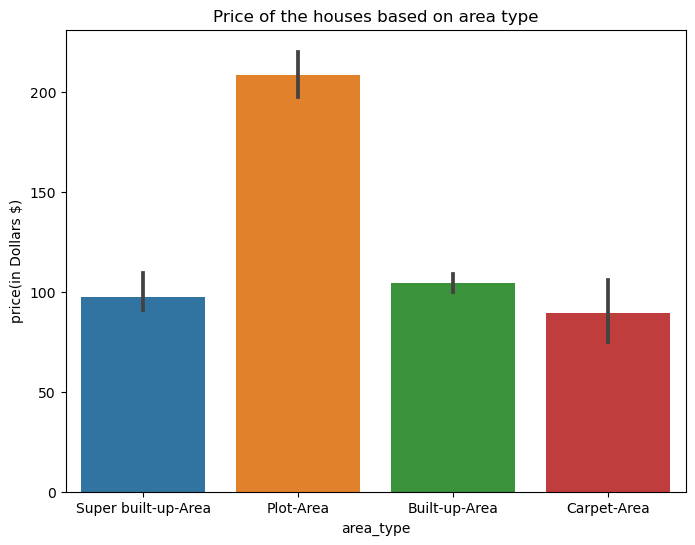

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(x='area_type',y='price(in Dollars $)',data=df)
plt.title('Price of the houses based on area type')
plt.show()

## Total rooms vs bath vs balcony vs total_sqft_final vs price(in Dollars $)

<Figure size 800x600 with 0 Axes>

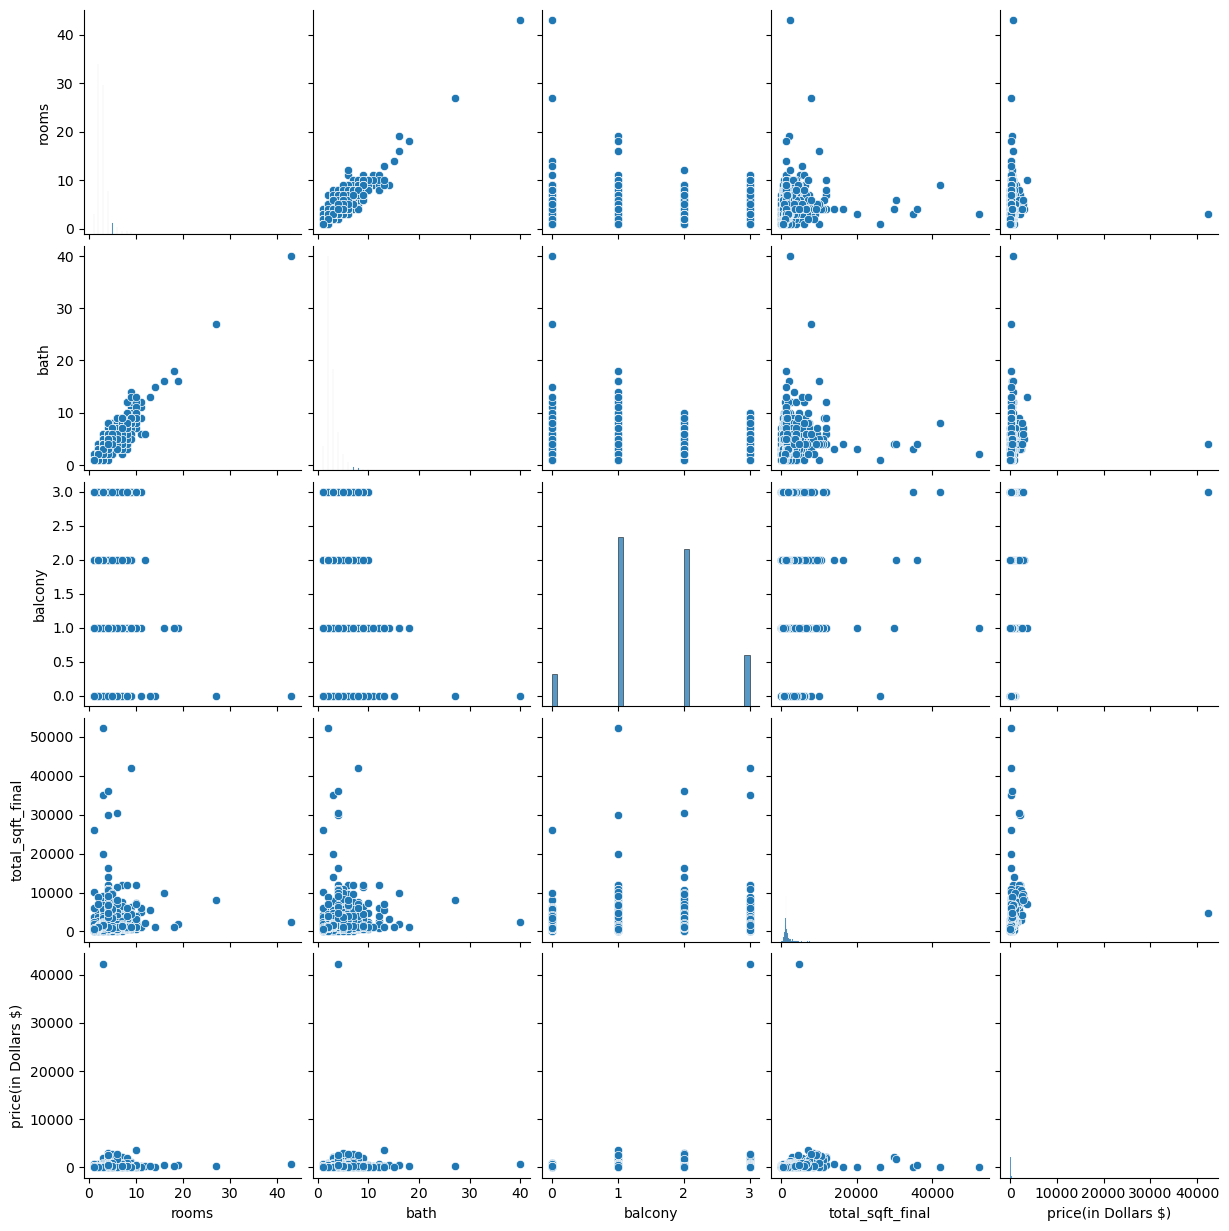

In [75]:
plt.figure(figsize=(8,6))
sns.pairplot(df[['rooms','bath','balcony','total_sqft_final','price(in Dollars $)']],data=df)
plt.show()

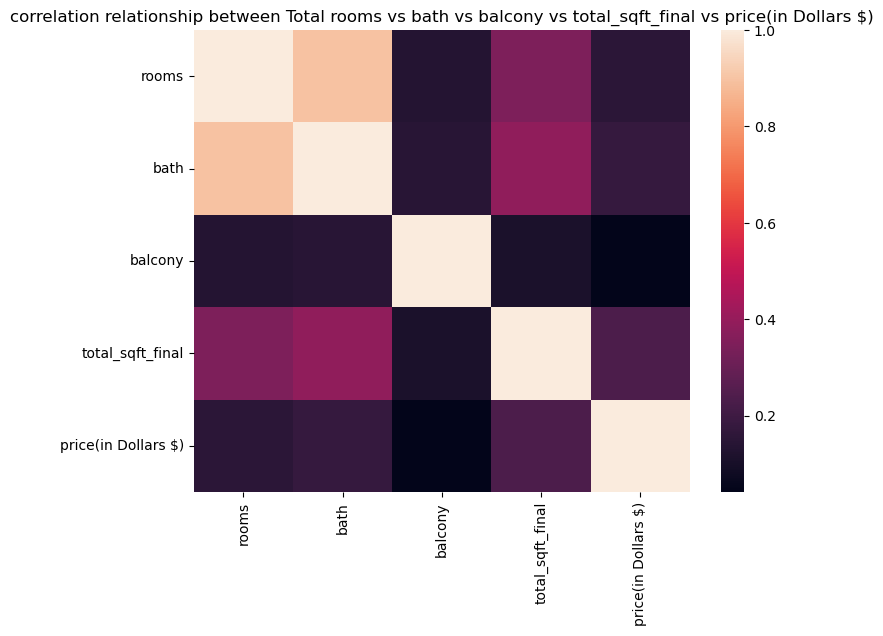

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['rooms','bath','balcony','total_sqft_final','price(in Dollars $)']].corr(),data=df)
plt.title('correlation relationship between Total rooms vs bath vs balcony vs total_sqft_final vs price(in Dollars $)')
plt.show()

# checking for outliers

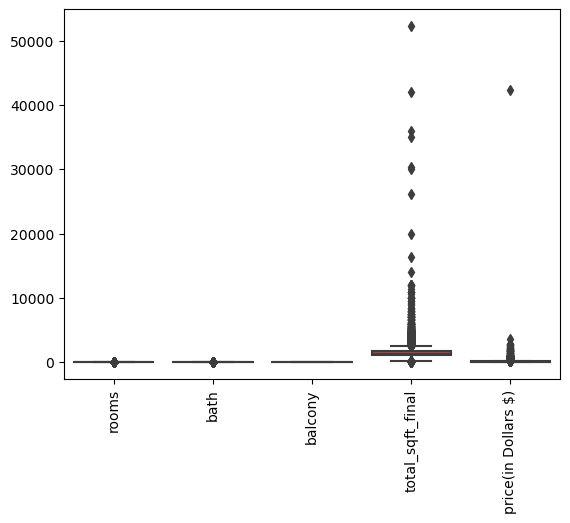

In [77]:
sns.boxplot(data=df[['rooms','bath','balcony','total_sqft_final','price(in Dollars $)']])
plt.xticks(rotation=90)
plt.show()

In [78]:
# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Identify outliers
outliers = ((df < (Q1 - threshold * IQR)) | df > (Q3 + threshold * IQR)).any(axis=1)

In [79]:
outliers.value_counts()
# the outlier count is turned out to be false

False    13320
dtype: int64

# Feature Engineering and Feature Scaling

### converting categorical columns into label columns using category encoders

In [80]:
pip install category_encoders

In [81]:
import category_encoders as ce

In [82]:
# Assuming 'target' is your target variable
target_encoder = ce.TargetEncoder(cols=['area_type', 'location', 'society'])
df = target_encoder.fit_transform(df, df['price(in Dollars $)'])



In [122]:
df.head()

,area_type,location,rooms,society,bath,balcony,price(in Dollars $),total_sqft_final
0,97.666069,48.317588,2.0,104.379802,2.0,1.0,39.07,1056.0
1,208.495486,115.387873,4.0,117.638374,5.0,3.0,120.00,2600.0
2,104.285498,61.252530,3.0,80.608377,2.0,3.0,62.00,1440.0
3,97.666069,115.482392,3.0,117.620888,3.0,1.0,95.00,1521.0
4,97.666069,95.829669,2.0,75.895410,2.0,1.0,51.00,1200.0


## splitting the data into training and testing data

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x=df.drop(columns=['price(in Dollars $)'])
y=df['price(in Dollars $)']

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

# 1)  Using Linear Regression for Predictions

In [87]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [88]:
# training the data
lm.fit(x_train,y_train)

LinearRegression()

In [89]:
lm_prediction=lm.predict(x_test)

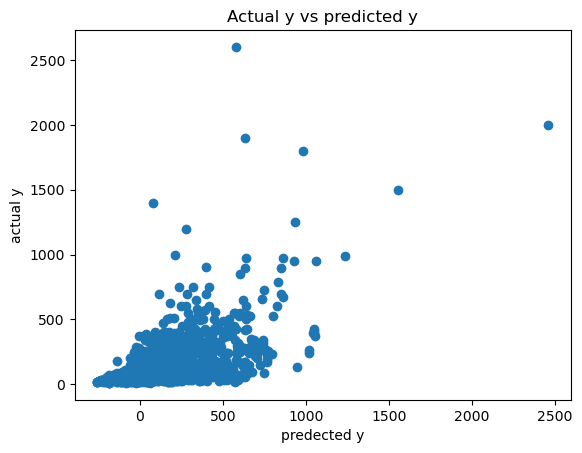

In [90]:
plt.scatter(lm_prediction,y_test)
plt.title('Actual y vs predicted y')
plt.xlabel('predected y')
plt.ylabel('actual y')
plt.show()

## checking the accuracy of linear regression model

In [91]:
from sklearn import metrics

In [92]:
print("mean squared error", metrics.mean_squared_error(lm_prediction,y_test))
print("mean absolute error", metrics.mean_absolute_error(lm_prediction,y_test))
print("root mean squared error", np.sqrt(metrics.mean_squared_error(lm_prediction,y_test)))
print("R-squared", metrics.r2_score(lm_prediction, y_test))

mean squared error 23201.576009283875
mean absolute error 99.96723207889762
root mean squared error 152.32063553335075
R-squared 0.3271937288043475


# 2) Using Decesion Tree for Predictions

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dtr=DecisionTreeRegressor()

In [95]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [96]:
dtr_prediction=dtr.predict(x_test)

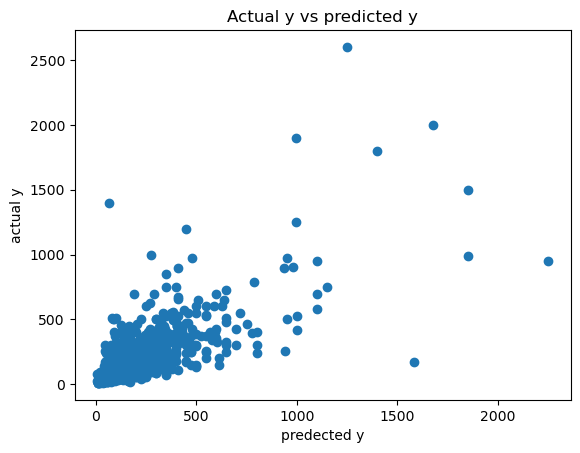

In [97]:
plt.scatter(dtr_prediction,y_test)
plt.title('Actual y vs predicted y')
plt.xlabel('predected y')
plt.ylabel('actual y')
plt.show()

## checking the accuracy of Decision Tree Regression model

In [98]:
print("mean squared error", metrics.mean_squared_error(dtr_prediction,y_test))
print("mean absolute error", metrics.mean_absolute_error(dtr_prediction,y_test))
print("root mean squared error", np.sqrt(metrics.mean_squared_error(dtr_prediction,y_test)))
print("R-squared", metrics.r2_score(dtr_prediction, y_test))

mean squared error 7545.39096150718
mean absolute error 33.013678277920306
root mean squared error 86.86420989974629
R-squared 0.5916961876360904


# 3) Using K Nearest Neghbours  for Predictions

In [99]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
knn=KNeighborsRegressor(n_neighbors=7)

In [101]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [102]:
knn_prediction=knn.predict(x_test)

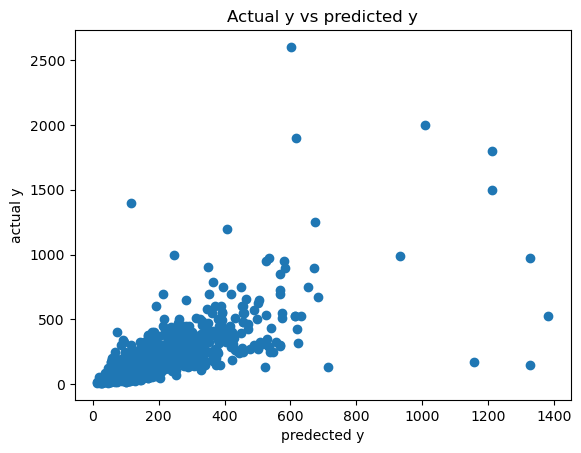

In [103]:
plt.scatter(knn_prediction,y_test)
plt.title('Actual y vs predicted y')
plt.xlabel('predected y')
plt.ylabel('actual y')
plt.show()

## checking the accuracy of K Nearest Neighbors Regression model

In [104]:
print("mean squared error", metrics.mean_squared_error(knn_prediction,y_test))
print("mean absolute error", metrics.mean_absolute_error(knn_prediction,y_test))
print("root mean squared error", np.sqrt(metrics.mean_squared_error(knn_prediction,y_test)))
print("R-squared", metrics.r2_score(knn_prediction, y_test))

mean squared error 6950.606155252191
mean absolute error 30.97405448305448
root mean squared error 83.37029540101312
R-squared 0.38540669634961666


# 4) Using Random Forest for Predictions

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [107]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [108]:
rf_prediction=rf.predict(x_test)

In [109]:
rf_prediction_train=rf.predict(x_train)

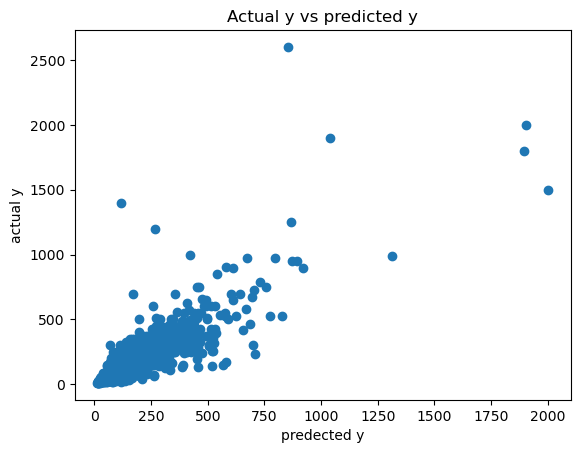

In [110]:
plt.scatter(rf_prediction,y_test)
plt.title('Actual y vs predicted y')
plt.xlabel('predected y')
plt.ylabel('actual y')
plt.show()

## checking the accuracy of Random Forest Regression model

In [111]:
print("mean squared error", metrics.mean_squared_error(rf_prediction,y_test))
print("mean absolute error", metrics.mean_absolute_error(rf_prediction,y_test))
print("root mean squared error", np.sqrt(metrics.mean_squared_error(rf_prediction,y_test)))
print("R-squared", metrics.r2_score(rf_prediction, y_test))

mean squared error 4342.022388491615
mean absolute error 24.58343186158015
root mean squared error 65.89402392092636
R-squared 0.6892446645288923


In [112]:
print("mean squared error", metrics.mean_squared_error(rf_prediction_train,y_train))

mean squared error 38251.78746431614


# 5) Using XGBoost (Extreme Gradient Boosting) Regression for Predictions

In [113]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [114]:
import xgboost as xgb

In [115]:
xg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 100)

In [116]:
xg.fit(x_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [117]:
xg_prediction=xg.predict(x_test)

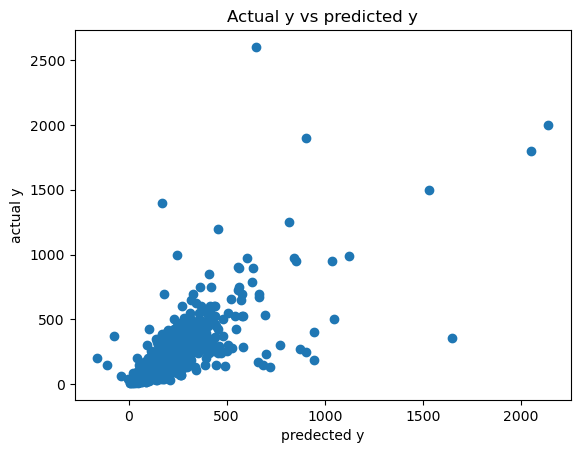

In [118]:
plt.scatter(xg_prediction,y_test)
plt.title('Actual y vs predicted y')
plt.xlabel('predected y')
plt.ylabel('actual y')
plt.show()

## checking the accuracy of XGBoost (Extreme Gradient Boosting) Regression model

In [119]:
print("mean squared error", metrics.mean_squared_error(xg_prediction,y_test))
print("mean absolute error", metrics.mean_absolute_error(xg_prediction,y_test))
print("root mean squared error", np.sqrt(metrics.mean_squared_error(xg_prediction,y_test)))
print("R-squared", metrics.r2_score(xg_prediction, y_test))

mean squared error 6396.83296273093
mean absolute error 31.32350208666804
root mean squared error 79.98020356770124
R-squared 0.5497473935773207


# Comparison of all five machine learning algorithms that I have considered for predicting the test values.

In [120]:

data = {
    'Mean squared error': [metrics.mean_squared_error(lm_prediction, y_test),
     metrics.mean_squared_error(dtr_prediction, y_test),
     metrics.mean_squared_error(knn_prediction, y_test),
     metrics.mean_squared_error(rf_prediction, y_test),
     metrics.mean_squared_error(xg_prediction, y_test)]
}

data1=pd.DataFrame(data)
data1.index=['Linear Regression','Decision Tree','K Nearest Neighbors', 'Random Forest','xgboost']
data1

,Mean squared error
Linear Regression,23201.576009
Decision Tree,7545.390962
K Nearest Neighbors,6950.606155
Random Forest,4342.022388
xgboost,6396.832963


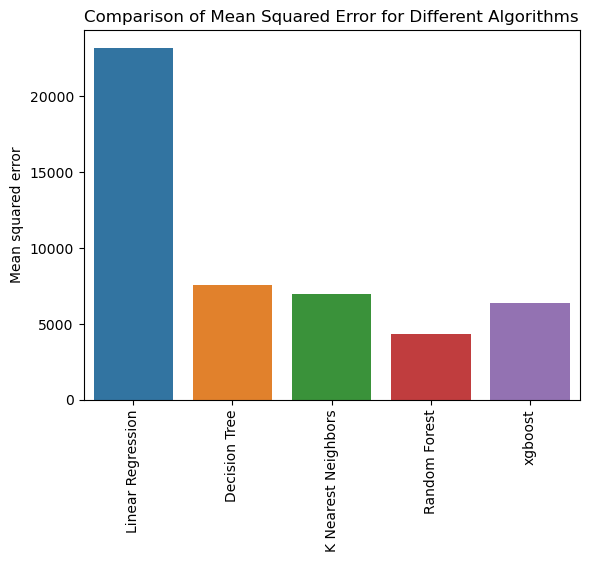

In [121]:
sns.barplot(x=data1.index,y=data1['Mean squared error'])
plt.title('Comparison of Mean Squared Error for Different Algorithms')
plt.xticks(rotation=90)
plt.show()

#Random Forest Performs Best:

#The Random Forest model has the lowest mean squared error (4342.022388), indicating that, on average, its predictions have the smallest squared differences from the actual values among the models compared.
#Decision Tree and K Nearest Neighbors (KNN):

#The Decision Tree and K Nearest Neighbors models have higher mean squared errors compared to Random Forest but lower than Linear Regression and XGBoost. They perform reasonably well but are outperformed by Random Forest.
#Linear Regression and XGBoost:

#Linear Regression and XGBoost have relatively higher mean squared errors compared to the other models. This suggests that, on average, their predictions have larger squared differences from the actual values.
#Consider Model Complexity:

#The lower MSE of Random Forest compared to Decision Tree highlights the benefit of ensemble methods that can reduce overfitting and improve generalization.
#Potential Overfitting:

#The comparatively higher MSE for Linear Regression and XGBoost may indicate that these models are either less suitable for the data or might be overfitting the training data.
#Consider Other Metrics:

#While MSE provides a measure of the average squared differences, it's essential to consider other metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to get a more comprehensive understanding of the model performance.
#Further Investigation:

#It's crucial to explore additional aspects such as feature importance, model interpretability, and the nature of the data to gain insights into the strengths and weaknesses of each model.